## ROC Analysis to Determine of Optimum Threshold for SpMAX4_Bh(s)
In this notebook, ROC curve was analyzed to determine optimum SpMAX4_Bh(s) threshold for classifying INP former and non-former drugs. We included all experimental data we have gathered until now (N=60). 

Our criteria for optimum threshold value was the point that maximizes sum of specificity and sensitivity.  
           sensitivity + specificity = true  positive  rate - false  positive rate.

In [1]:
import pandas as pd
import numpy as np
import os
import re
from __future__ import print_function, division
import matplotlib.pyplot as plt
%matplotlib inline

#### Import experimental data and descriptor values

In [2]:
df_molecules = pd.read_csv("experimental_dataset_N60_SpMAX4Bhs.csv")
df_molecules.head()

,Drug Name,SpMAX4_Bh(s),Experimental INP Formation,SpMAX4_Bh(s) Analysis Group
0,ABT737,7.00,Yes,Validation
1,Apitolisib,5.01,No,Validation
2,Avagacestat,8.00,Yes,Validation
3,Avasimibe,4.79,Yes,Validation
4,AZD-4547,4.72,No,Validation


In [3]:
df_molecules["Experimental Category"]=None

for i,row in enumerate(df_molecules.iterrows()):
    if df_molecules.ix[i,"Experimental INP Formation"] == "Yes" :
        df_molecules.ix[i, "Experimental Category"] = 1
    else:
        df_molecules.ix[i, "Experimental Category"] = 0

df_molecules.head()

,Drug Name,SpMAX4_Bh(s),Experimental INP Formation,SpMAX4_Bh(s) Analysis Group,Experimental Category
0,ABT737,7.00,Yes,Validation,1
1,Apitolisib,5.01,No,Validation,0
2,Avagacestat,8.00,Yes,Validation,1
3,Avasimibe,4.79,Yes,Validation,1
4,AZD-4547,4.72,No,Validation,0


### 1. SpMAX4_Bh(s) Logistic Regression

In [4]:
# independent variable
X_train = df_molecules["SpMAX4_Bh(s)"].reshape(-1, 1)

# dependent classification
y_train = np.array(df_molecules.ix[:,"Experimental Category"], dtype=int)

# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [5]:
# make class predictions for the training set
y_pred_class = logreg.predict(X_train)

# print first 35 observations and prediction classes
print('True:', y_train[0:35])
print('Pred:', y_pred_class[0:35])

True: [1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0]
Pred: [1 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0]


In [6]:
# store the predicted probabilities for class 1
y_pred_prob = logreg.predict_proba(X_train)[:, 1]
y_pred_prob

array([ 0.64992968,  0.36211724,  0.77103518,  0.33243725,  0.32325288,
        0.57375666,  0.35254593,  0.70325757,  0.35937101,  0.74142688,
        0.26994532,  0.26527731,  0.74028371,  0.351188  ,  0.70573672,
        0.77103518,  0.77103518,  0.31677456,  0.70449866,  0.57084174,
        0.77103518,  0.32848497,  0.70325757,  0.64992968,  0.3377438 ,
        0.32717288,  0.351188  ,  0.37737887,  0.38722116,  0.34712871,
        0.38439927,  0.70573672,  0.32195167,  0.70573672,  0.32848497,
        0.35800133,  0.70573672,  0.30655614,  0.70449866,  0.77103518,
        0.77103518,  0.36074299,  0.35663396,  0.70573672,  0.33641327,
        0.69574828,  0.77103518,  0.37040953,  0.70449866,  0.3457805 ,
        0.29281169,  0.26994532,  0.70573672,  0.3377438 ,  0.70697176,
        0.70573672,  0.64992968,  0.29528373,  0.31036653,  0.34847937])

### 2. SpMAX4_Bh(s) ROC analysis for threshold determination

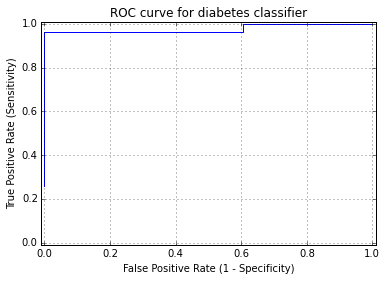

In [7]:
from sklearn import metrics

# IMPORTANT: first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [8]:
print("TPR:", tpr)
print("FPR:", fpr)
print("Thresholds:", thresholds)

TPR: [ 0.25925926  0.37037037  0.62962963  0.74074074  0.81481481  0.85185185
  0.96296296  0.96296296  0.96296296  0.96296296  0.96296296  0.96296296
  1.          1.          1.          1.          1.        ]
FPR: [ 0.          0.          0.          0.          0.          0.          0.
  0.36363636  0.42424242  0.51515152  0.57575758  0.60606061  0.60606061
  0.66666667  0.90909091  0.96969697  1.        ]
Thresholds: [ 0.77103518  0.70697176  0.70573672  0.70449866  0.70325757  0.69574828
  0.64992968  0.35254593  0.351188    0.3457805   0.3377438   0.33641327
  0.33243725  0.32848497  0.29281169  0.26994532  0.26527731]


In [9]:
# Optimum threshold criteria is maximum specificity and sensitivity.
sum_of_specificity_and_sensitivity = np.full(thresholds.size, np.nan)

for i, threshold in enumerate(np.nditer(thresholds)):
    # print(i, threshold)
    sensitivity = tpr[i]
    specificity = 1 - fpr[i]
    sum_of_specificity_and_sensitivity[i] = sensitivity + specificity

# Determine optimum threshold based on maximum specificity and sensitivity
optimum_threshold_probability = thresholds[sum_of_specificity_and_sensitivity == max(sum_of_specificity_and_sensitivity)]
print("Optimum threshold probability: ", optimum_threshold_probability[0])

# Let's find the NHISS threshold value that corresponds to threshold probability
SPMAX4_range = np.arange(min(X_train)[0], max(X_train)[0], 0.01)
for SPMAX4 in SPMAX4_range:
    #print(SPMAX4)
    probability = logreg.predict_proba(SPMAX4)[0][1]
    if probability >= optimum_threshold_probability:
        print("SpMAX4_Bh(s) threshold: ", SPMAX4)
        break

Optimum threshold probability:  0.649929682293
SpMAX4_Bh(s) threshold:  7.01
